In [171]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
%matplotlib inline

In [173]:
from utils import *

In [174]:
dataset = LabeledSet(1)

for i in range(0, 50):
    dataset.addExample([random.randint(0,4)],1)
for i in range(0, 50):
    dataset.addExample([random.randint(5, 9)], 2)

In [175]:
np.count_nonzero(dataset.y == 2)

50

In [176]:
dataset_inf = LabeledSet(1)
dataset_sup = LabeledSet(1)

dataset_inf.addExamples(dataset.x[:50],dataset.y[:50])
dataset_sup.addExamples(dataset.x[50:],dataset.y[50:])

In [177]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

In [178]:
node = BinaryTree()
node.attribute = 0
node.threshold = 5

inf_leaf = BinaryTree()
inf_leaf.addLeaf(1, dataset_inf)
sup_leaf = BinaryTree()
sup_leaf.addLeaf(2, dataset_sup)

node.inf = inf_leaf
node.sup = sup_leaf

t = RDMT(rsdm, "shannon", 0, 100, 0.1 * dataset.size(), [1, 2])
t.root = node
t.labeled_set = dataset

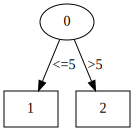

In [195]:
t.plot()

In [179]:
NMI1(t.labeled_set)

0.0

In [180]:
t.get_ratio_non_monotone_pairs()

0.0

In [181]:
def swap_examples(node):
    inf_set = node.inf.labeled_set
    sup_set = node.sup.labeled_set
    
    r1 = np.random.choice(np.where(inf_set.y == 1)[0])
    r2 = np.random.choice(np.where(sup_set.y == 2)[0])
    
#     while True:
#         r1 = np.random.choice(np.arange(0, 50))
#         r2 = np.random.choice(np.arange(0, 50))
#         y1 = inf_set.getY(r1)[0]
#         y2 = sup_set.getY(r2)[0]
#         if y1 < y2:
#             break
    inf_set.y[r1] = 2
    sup_set.y[r2] = 1
    return inf_set, sup_set

In [182]:
ratio = []
nmi = []
h1 = []
h2 = []

for i in range(0,51):
    if i > 0:
        inf_set, sup_set = swap_examples(t.root)
        t.root.inf.labeled_set = inf_set
        t.root.sup.labeled_set = sup_set
    ratio.append(t.get_ratio_non_monotone_pairs())
    nmi.append(NMI1(t.labeled_set))
    
    dsa = rsdm.f.dominant_sets_attribute(t.labeled_set, 0)
    dsl = rsdm.f.dominant_sets_label(t.labeled_set)
    esa = rsdm.f.equal_sets_attribute(t.labeled_set, 0)
    esl = rsdm.f.equal_sets_label(t.labeled_set)
    
    h1.append(rsdm.value(t.labeled_set, 0, dsa, dsl, esa, esl))
    h2.append(sdm.value(t.labeled_set, 0, dsa, dsl, esa, esl))

In [163]:
NMI1(dataset)

0.5050505050505051

In [190]:
x = np.arange(0, 101, 2)
x

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

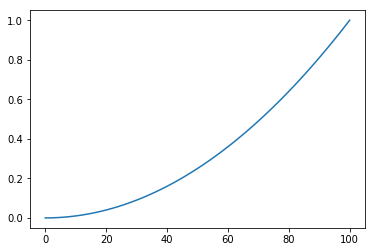

In [191]:
plt.plot(x, ratio)

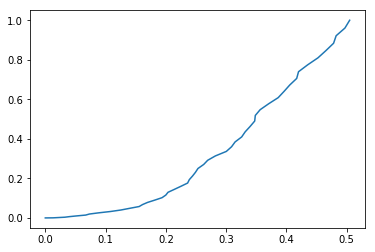

In [192]:
plt.plot(nmi, ratio)

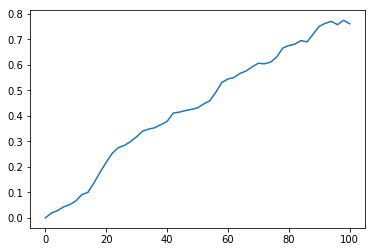

In [193]:
plt.plot(x, h1)

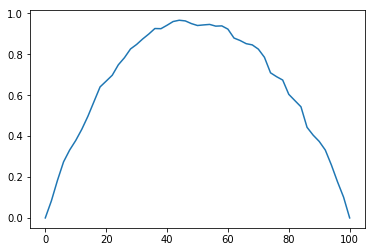

In [194]:
plt.plot(x, h2)